In [21]:
import numpy as np
import matplotlib.pyplot as plt

import rebound
from progressbar import progressbar

In [30]:
dt = 2*np.pi/2

jm_to_sm = 1/1000
a1=50
sim = rebound.Simulation()
sim.integrator = "whfast"
sim.ri_whfast.safe_mode = 0

sim.add(m=1)
sim.add(m=1*jm_to_sm, a=a1)
sim.add(m=1*jm_to_sm, a=a1*(2**(2/3)) )
sim.add(m=1.5*jm_to_sm, a=a1*(4**(2/3)) )

sim.dt = dt

n_particles = sim.N_real

sim.move_to_com()

sim.init_megno()
sim.exit_max_distance = 100

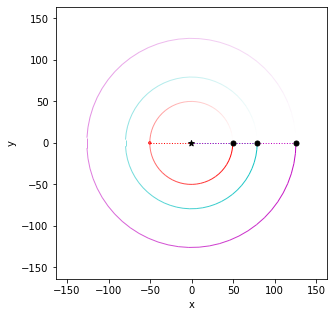

In [40]:
rebound.OrbitPlot(sim, color=True, periastron=True);
plt.savefig('rebound_ex.pdf')

In [49]:
try:
    sim.integrate(1e6*2*np.pi, exact_finish_time=0)
    megno = sim.calculate_megno()
    
except rebound.Escape:
    megno = 10

In [50]:
print(megno)

97.88204809231918


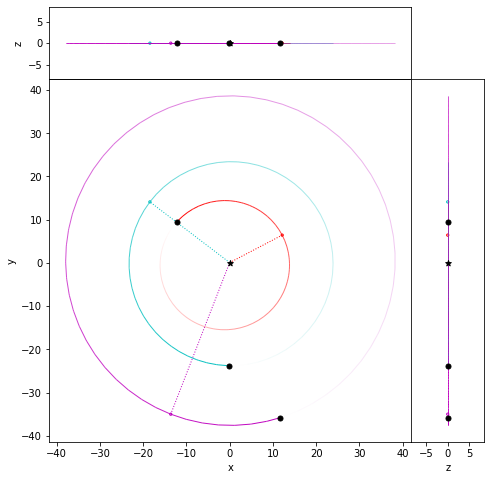

In [39]:
rebound.OrbitPlot(sim, slices=0.2, color=True, periastron=True, xlim=[-3,3], ylim=[-3,3]);